# **Student Performance Analysis and Prediction**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

# **Problem Statement**
This project understands how the student’s performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, and Lunch and Test preparation course.

In [ ]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
df.shape

(1000, 8)

# **Dataset Information**




*  gender: sex of students -> (Male/female)
race/ethnicity: ethnicity of students -> (Group A, B, C, D, E)
parental level of education: parents’ final

* education ->(bachelor’s degree, some college, master’s degree, associate’s degree)
* lunch: having lunch before test (standard or free/reduced)
* test preparation course: complete or not complete before test
* math score
* reading score
* writing score




# **Check Missing Values**

In [ ]:
df.count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64

In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**DataSet has  no missing values**

# **Check Duplicates**

In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**There are no duplicates values in the dataset**

# **Check the Data Types**

In [ ]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# **Insight**


*   The numerical data shown above shows that all means are fairly similar to one another, falling between 66 and 68.05.
*   The range of all standard deviations, between 14.6 and 15.19, is also narrow.
* While there is a minimum score of 0 for math, the minimums for writing and reading are substantially higher at 10 and 17, respectively.
* We don’t have any duplicate or missing values, and the following codes will provide a good data checking

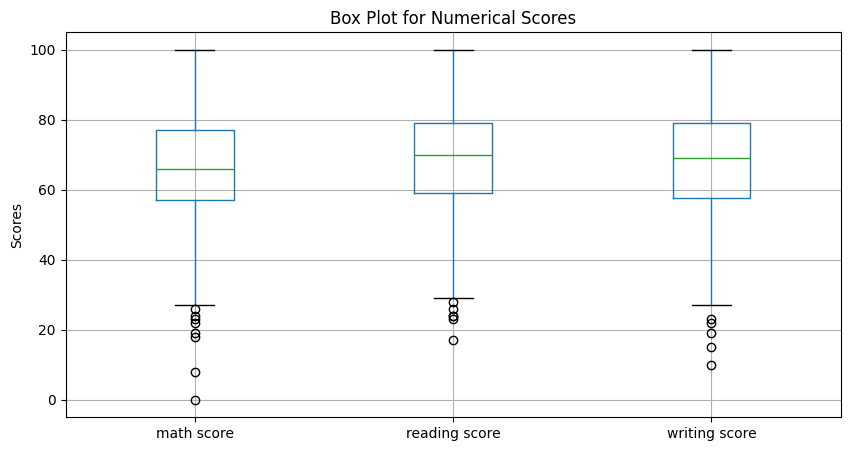

In [ ]:
df[['math score', 'reading score', 'writing score']].boxplot()
plt.title('Box Plot for Numerical Scores')
plt.ylabel('Scores')
plt.show()

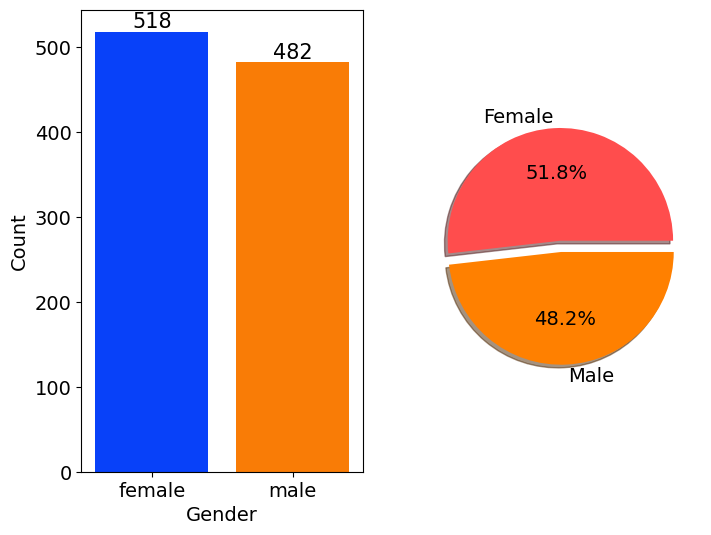

In [ ]:
# Create a figure with two subplots
f,ax=plt.subplots(1,2,figsize=(8,6))


# Create a countplot of the 'gender' column and add labels to the bars
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

# Set font size of x-axis and y-axis labels and tick labels
ax[0].set_xlabel('Gender', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(labelsize=14)
# Create a pie chart of the 'gender' column and add labels to the slices
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'], textprops={'fontsize': 14})

# Display the plot
plt.show()

**Gender has balanced data with female students are 518 (52%) and male students are 482 (48%)**

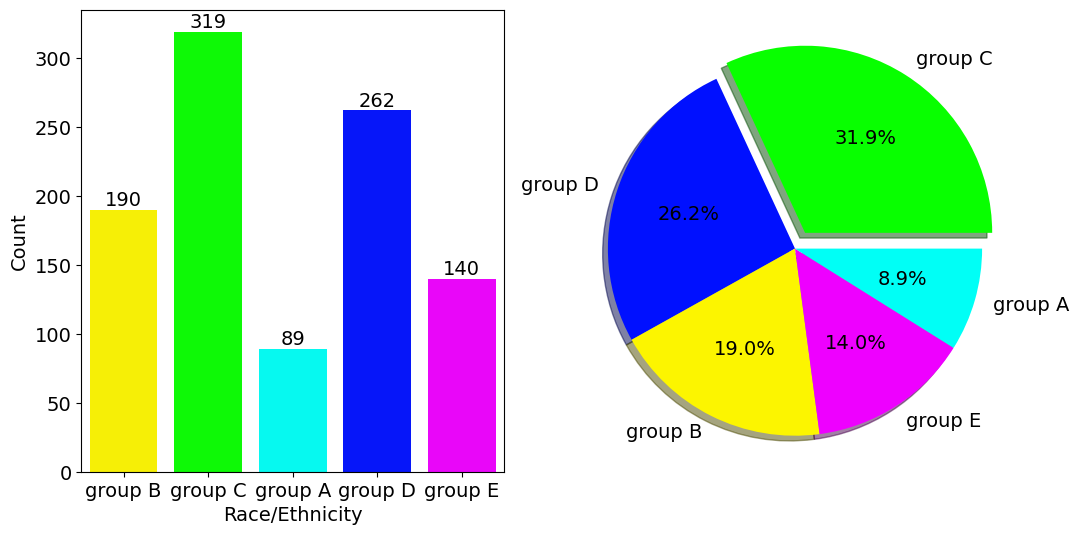

In [ ]:
# Create a figure with two subplots
colors = sns.color_palette("hsv", len(df['race/ethnicity'].unique()))  # Example color palette

f, ax = plt.subplots(1, 2, figsize=(12, 6))

# Create a countplot of the 'race/ethnicity' column and add labels to the bars
sns.countplot(x=df['race/ethnicity'], palette=colors, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)

# Set font size of x-axis and y-axis labels and tick labels
ax[0].set_xlabel('Race/Ethnicity', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(labelsize=14)

# Create a dictionary that maps category names to colors in the color palette
color_dict = dict(zip(df['race/ethnicity'].unique(), colors))

# Map the colors to the pie chart slices
pie_colors = [color_dict[race] for race in df['race/ethnicity'].value_counts().index]

# Create a pie chart of the 'race/ethnicity' column and add labels to the slices
ax[1].pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index,
          explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True, colors=pie_colors,
          textprops={'fontsize': 14})

# Set the aspect ratio of the pie chart to 'equal' to make it a circle
ax[1].axis('equal')

# Display the plot
plt.show()

  

*   Most of the student belonging from group C /group D.
*  Lowest number of students belong to group A.




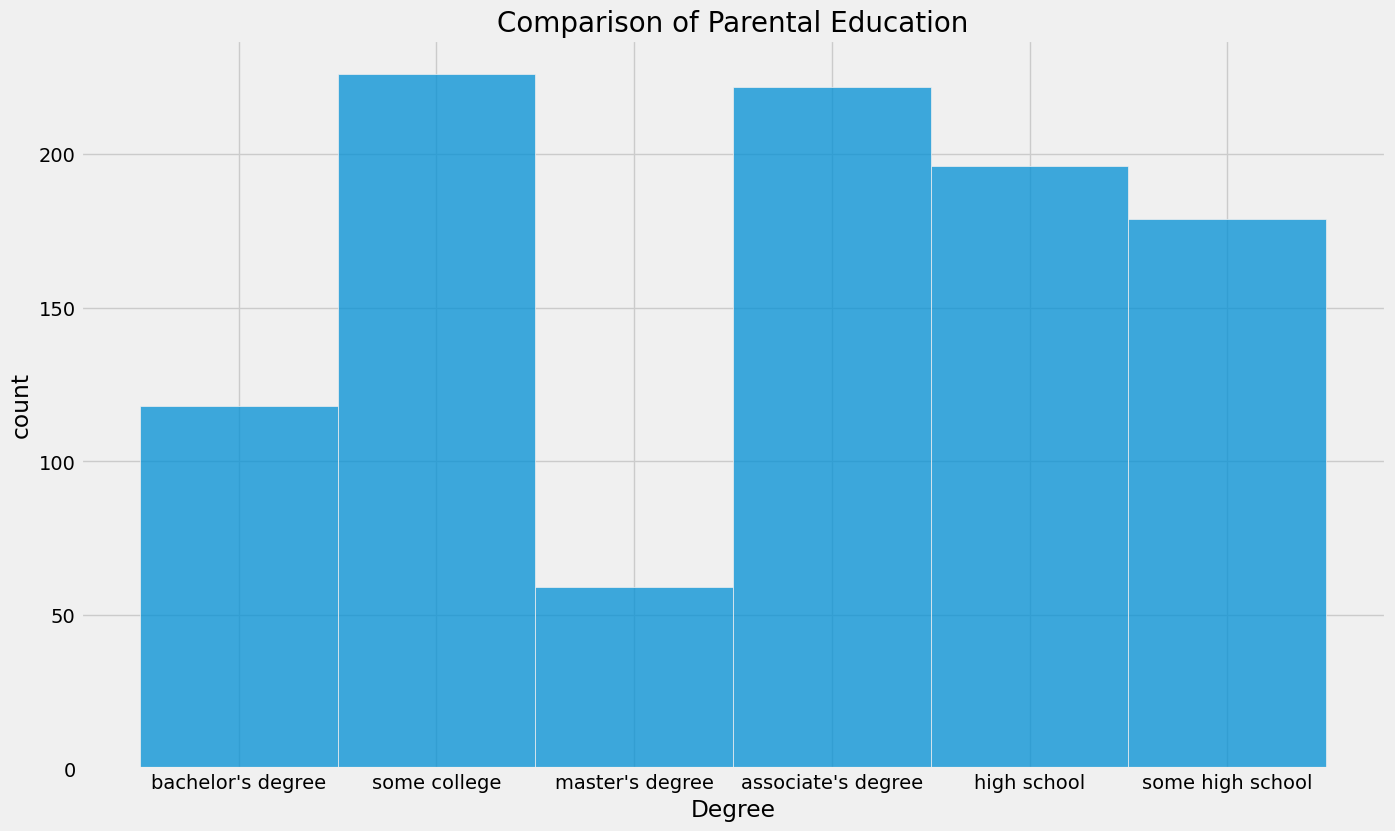

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.histplot(df["parental level of education"], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

**Largest number of parents are from college.**

<function matplotlib.pyplot.axis(arg: 'tuple[float, float, float, float] | bool | str | None' = None, /, *, emit: 'bool' = True, **kwargs) -> 'tuple[float, float, float, float]'>

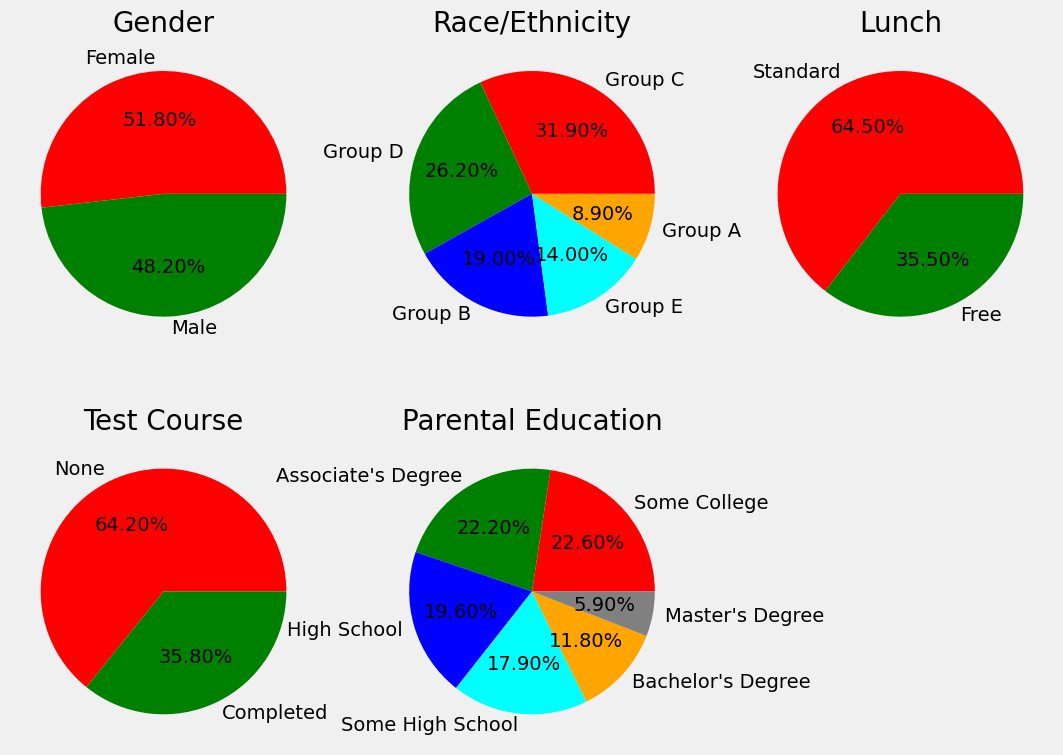

In [ ]:
# Set figure size
plt.rcParams['figure.figsize'] = (12, 9)

# First row of pie charts
plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Second row of pie charts
plt.subplot(2, 3, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')
plt.subplot(2, 3, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis

* The number of Male and Female students is almost equal.
* The number of students is higher in Group C.
* The number of students who have standard lunch is greater.
* The number of students who have not enrolled in any test preparation course is greater.
*The number of students whose parental education is “Some College” is greater followed closely by “Associate’s Degr
*From the above plot, it is clear that all the scores increase linearly with each other.

**Student’s Performance is related to lunch, race, and parental level educatio**.

* Females lead in pass percentage and also are top-scorers.
* Student Performance is not much related to test preparation course.
* The finishing preparation course is beneficial.ee”.

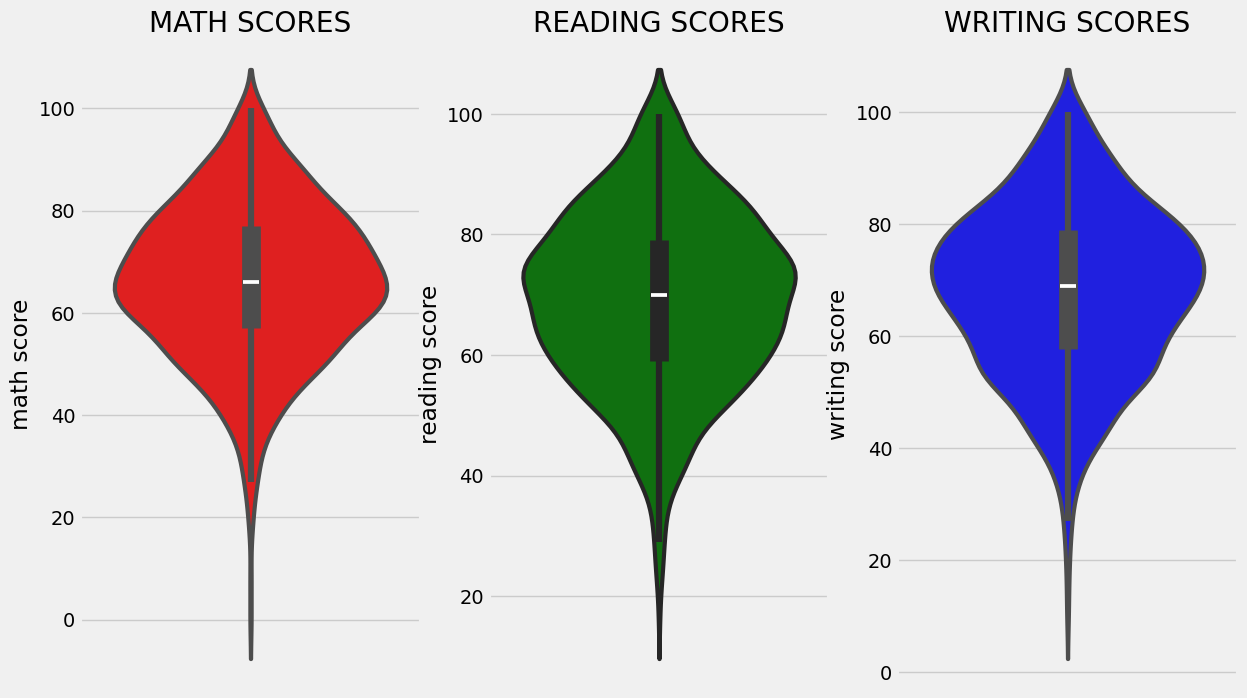

In [ ]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)

plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)

plt.show()

**From the above three plots its clearly visible that most of the students score in between *60-80 in Maths* whereas in *reading and writing most of them score from 50-80*.**

In [ ]:
df.drop('parental level of education', inplace=True, axis=1)
df.drop('lunch', inplace=True, axis=1)
df

,gender,race/ethnicity,test preparation course,math score,reading score,writing score
0,female,group B,none,72,72,74
1,female,group C,completed,69,90,88
2,female,group B,none,90,95,93
3,male,group A,none,47,57,44
4,male,group C,none,76,78,75
...,...,...,...,...,...,...
995,female,group E,completed,88,99,95
996,male,group C,none,62,55,55
997,female,group C,completed,59,71,65
998,female,group D,completed,68,78,77


In [ ]:
objcat = ['gender','race/ethnicity','test preparation course']

for colname in objcat:
    df[colname] = df[colname].astype('category')

In [ ]:
df.select_dtypes(['category']).columns

Index(['gender', 'race/ethnicity', 'test preparation course'], dtype='object')

In [ ]:
Gender = pd.get_dummies(df['gender'], drop_first = True).astype(int) # drop_first prevents multi-collinearity
Race_Ethnicity = pd.get_dummies(df['race/ethnicity'], drop_first = True).astype(int)
TestPreparationCourse = pd.get_dummies(df['test preparation course'], drop_first = True).astype(int)

In [ ]:
# Add new dummy columns to data frame
df = pd.concat([df, Gender,Race_Ethnicity,TestPreparationCourse], axis = 1)
df.head(5)

,gender,race/ethnicity,test preparation course,math score,reading score,writing score,male,group B,group C,group D,group E,none
0,female,group B,none,72,72,74,0,1,0,0,0,1
1,female,group C,completed,69,90,88,0,0,1,0,0,0
2,female,group B,none,90,95,93,0,1,0,0,0,1
3,male,group A,none,47,57,44,1,0,0,0,0,1
4,male,group C,none,76,78,75,1,0,1,0,0,1


In [ ]:
df.drop('gender',inplace=True,axis=1)
df.drop('race/ethnicity',inplace=True,axis=1)
df.drop('test preparation course',inplace=True,axis=1)
df.head()

,math score,reading score,writing score,male,group B,group C,group D,group E,none
0,72,72,74,0,1,0,0,0,1
1,69,90,88,0,0,1,0,0,0
2,90,95,93,0,1,0,0,0,1
3,47,57,44,1,0,0,0,0,1
4,76,78,75,1,0,1,0,0,1


In [ ]:
df = df.rename(columns={"none": "test preparation course"})
df.head()

,math score,reading score,writing score,male,group B,group C,group D,group E,test preparation course
0,72,72,74,0,1,0,0,0,1
1,69,90,88,0,0,1,0,0,0
2,90,95,93,0,1,0,0,0,1
3,47,57,44,1,0,0,0,0,1
4,76,78,75,1,0,1,0,0,1


Splitting the X and Y Variables

In [ ]:
x = df.drop(columns="math score",axis=1)
y = df["math score"]

In [ ]:
x # x Represents the Features
x.shape

(1000, 8)

In [ ]:
y # y represents the Target
y.shape

(1000,)

In [ ]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

In [ ]:
x_train.shape
x_train

,reading score,writing score,male,group B,group C,group D,group E,test preparation course
423,85,80,0,0,0,0,0,0
157,60,60,1,1,0,0,0,1
670,76,68,0,0,1,0,0,1
256,73,68,0,0,1,0,0,1
965,70,72,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
575,55,53,1,0,0,0,0,0
838,57,53,1,1,0,0,0,0
337,51,43,1,0,1,0,0,1
523,59,50,1,0,1,0,0,1


In [ ]:
y_train

423    59
157    60
670    66
256    64
965    62
       ..
575    40
838    58
337    49
523    54
863    71
Name: math score, Length: 800, dtype: int64

In [ ]:
x_test.shape
x_test

,reading score,writing score,male,group B,group C,group D,group E,test preparation course
545,83,80,1,0,0,0,1,0
298,46,50,1,0,1,0,0,0
109,64,72,0,1,0,0,0,1
837,82,79,0,0,0,0,0,0
194,84,85,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
68,58,56,1,1,0,0,0,1
449,73,72,1,1,0,0,0,1
715,94,87,0,1,0,0,0,0
793,84,77,1,0,0,0,1,0


# **Linear Regression Model**

In [ ]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create instance of model
lin_reg = LinearRegression()

# Pass training data into model
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predict
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(200,)
[87.61567124 50.79966466 62.32834146 66.55443471 72.44812245 70.49275961
 85.27405093 65.37595278 91.31919974 66.24056562 45.31528012 65.68643874
 74.18522603 57.38156033 21.45356725 54.84981224 93.84121943 83.64926623
 63.53264411 68.25401924 68.3099687  70.30685778 78.17997588 59.33997819
 48.63996959 51.19551632 72.68238664 78.41330439 43.66995839 53.92000237
 73.73531276 69.69264864 55.70199334 91.18502142 52.32538112 71.41309453
 51.10506812 58.39601523 65.83270218 77.90207341 80.70652634 69.36973094
 44.06297004 76.2194154  66.9515049  68.3217531  54.37516464 50.58827753
 57.55798722 75.27545244 54.25363553 64.77977606 75.29211013 60.55856983
 46.7394863  34.1624987  49.73481992 66.64335704 72.5176928  29.69693247
 98.16729708 48.98372913 65.75693067 63.03992808 69.15645596 44.47725211
 58.90672261 63.73455629 76.62969029 38.02983547 73.78178728 66.24606808
 57.20060678 47.12626737 46.9798697  73.61254314 63.34579011 67.18505218
 65.95031596 54.1742854  91.43460965 68.7320

In [ ]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
         78.00 |         87.62
         40.00 |         50.80
         70.00 |         62.33
         75.00 |         66.55
         69.00 |         72.45
         75.00 |         70.49
         89.00 |         85.27
         77.00 |         65.38
         87.00 |         91.32
         65.00 |         66.24
         48.00 |         45.32
         62.00 |         65.69
         81.00 |         74.19
         61.00 |         57.38
         29.00 |         21.45
         56.00 |         54.85
         91.00 |         93.84
         90.00 |         83.65
         56.00 |         63.53
         71.00 |         68.25
         54.00 |         68.31
         73.00 |         70.31
         85.00 |         78.18
         58.00 |         59.34
         55.00 |         48.64
         45.00 |         51.20
         68.00 |         72.68
         82.00 |         78.41
         52.00 |         43.67
         53.00 |         53.92
     

In [ ]:
residual = actual- y_pred.reshape(-1)
print(residual)

[-34.61567124   2.20033534  -9.32834146 -13.55443471 -19.44812245
 -17.49275961 -32.27405093 -12.37595278 -38.31919974 -13.24056562
   7.68471988 -12.68643874 -21.18522603  -4.38156033  31.54643275
  -1.84981224 -40.84121943 -30.64926623 -10.53264411 -15.25401924
 -15.3099687  -17.30685778 -25.17997588  -6.33997819   4.36003041
   1.80448368 -19.68238664 -25.41330439   9.33004161  -0.92000237
 -20.73531276 -16.69264864  -2.70199334 -38.18502142   0.67461888
 -18.41309453   1.89493188  -5.39601523 -12.83270218 -24.90207341
 -27.70652634 -16.36973094   8.93702996 -23.2194154  -13.9515049
 -15.3217531   -1.37516464   2.41172247  -4.55798722 -22.27545244
  -1.25363553 -11.77977606 -22.29211013  -7.55856983   6.2605137
  18.8375013    3.26518008 -13.64335704 -19.5176928   23.30306753
 -45.16729708   4.01627087 -12.75693067 -10.03992808 -16.15645596
   8.52274789  -5.90672261 -10.73455629 -23.62969029  14.97016453
 -20.78178728 -13.24606808  -4.20060678   5.87373263   6.0201303
 -20.61254314

<Axes: ylabel='Density'>

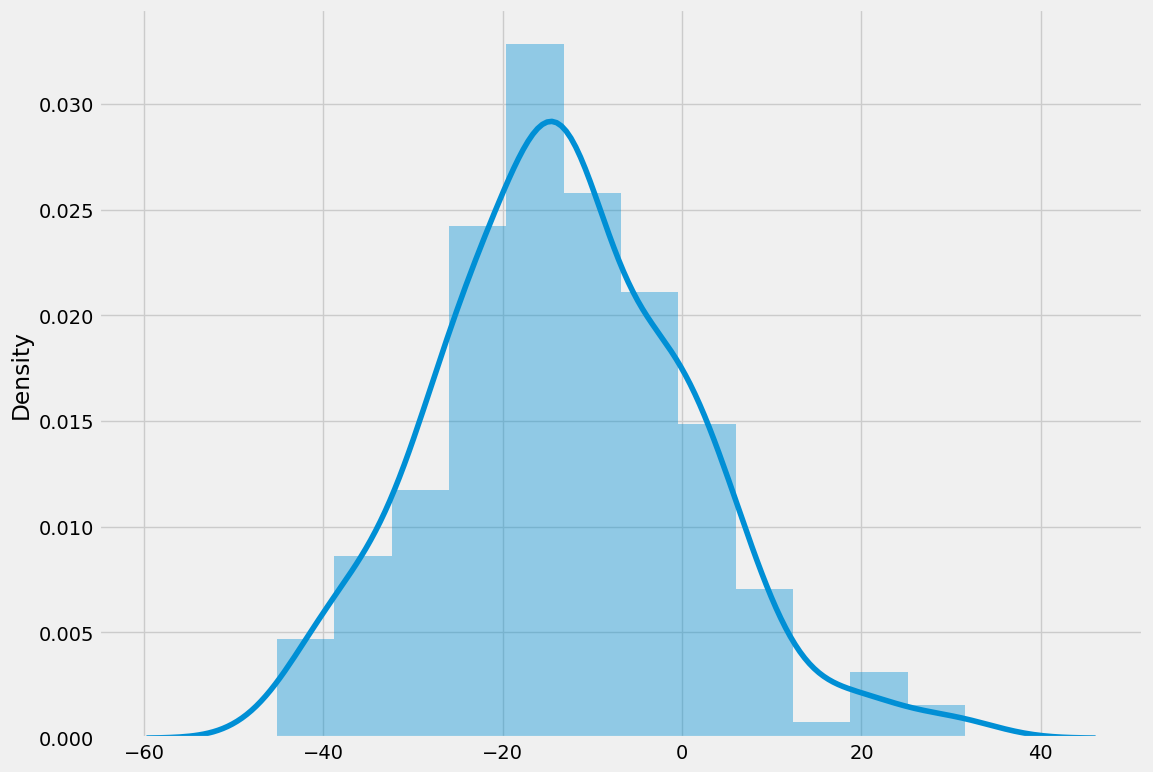

In [ ]:
# Distribution plot for Residual (difference between actual and predicted values)
sns.distplot(residual, kde=True)

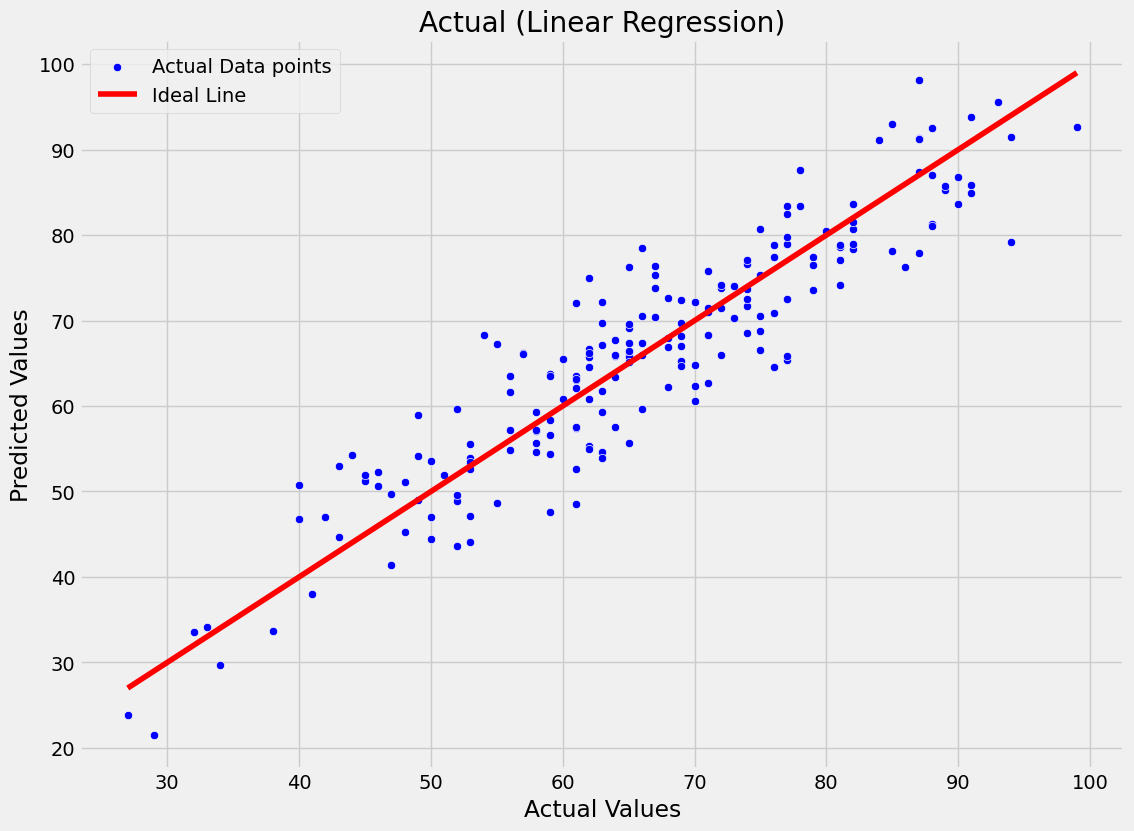

In [ ]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual (Linear Regression)')
plt.legend()
plt.show()

In [ ]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 32.06203798373014
Root Mean Squared Error: 5.66233502927283


# **Decisicon Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming x_train, y_train, x_test, y_test are already defined
# Create and train the DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)


y_pred_dt = dt_regressor.predict(x_test)

# Calculate the mean squared error for Decision Tree Regressor
dt_mse = mean_squared_error(y_test, y_pred_dt)

# Calculate the root mean squared error for Decision Tree Regressor
dt_rmse = np.sqrt(dt_mse)

# Print the Mean Squared Error and Root Mean Squared Error for Decision Tree Regression
print('Decision Tree Regression Mean Squared Error:', dt_mse)
print('Decision Tree Regression Root Mean Squared Error:', dt_rmse)


Decision Tree Regression Mean Squared Error: 55.7025
Decision Tree Regression Root Mean Squared Error: 7.4634107484447085


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Assuming x_train, y_train, x_test, y_test are already defined
# Create and train the RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)


y_pred_rf = rf_regressor.predict(x_test)

# Calculate the mean squared error for Random Forest Regressor
rf_mse = mean_squared_error(y_test, y_pred_rf)

# Calculate the root mean squared error for Random Forest Regressor
rf_rmse = np.sqrt(rf_mse)

# Print the Mean Squared Error and Root Mean Squared Error for Random Forest Regression
print('Random Forest Regression Mean Squared Error:', rf_mse)
print('Random Forest Regression Root Mean Squared Error:', rf_rmse)


Random Forest Regression Mean Squared Error: 35.965917910411
Random Forest Regression Root Mean Squared Error: 5.997159153333435


# **Comparison:**
* Linear Regression Model has the lowest MSE (32.06) and RMSE (5.66) among the three models. This indicates that Linear Regression performs the best on your dataset, providing the most accurate predictions.
* Random Forest Regression comes next with an MSE of 35.97 and RMSE of 6.00. While it performs better than the Decision Tree, it is still not as accurate as the Linear Regression model.
* Decision Tree Regression has the highest MSE (55.70) and RMSE (7.46), indicating that it performs the worst among the three models.

# **Conclusion:**
Based on the given results, the Linear Regression Model is the best model for your dataset as it has the lowest Mean Squared Error and Root Mean Squared Error, indicating it provides the most accurate predictions.